In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
df=pd.read_csv('dataset1.csv')
df=df[df['BoosterVersion']=='Falcon 9']

In [54]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
5,8,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
6,10,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
7,11,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
8,12,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857


In [55]:
#Identify and calculate the percentage of the missing values in each attribute
df.isnull().sum()/df.count()*100

FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass       15.503876
Orbit              0.675676
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        21.138211
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

In [56]:
df.shape

(149, 17)

In [57]:
#Identify which columns are numerical and categorical:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

## Exploratory Data Analysis

#### Launch Sites
The data contains several Space X  launch facilities: 
> - Cape Canaveral Space Launch Complex 40  <b>VAFB SLC 4E </b> , 
> - Vandenberg Air Force Base Space Launch Complex 4E <b>(SLC-4E)</b>, 
> - Kennedy Space Center Launch Complex 39A <b>KSC LC 39A </b>.
> - Kwajalein Atoll. 
The location of each Launch Is placed in the column <code>LaunchSite</code>

In [58]:
LaunchSite=df["LaunchSite"].value_counts()
LaunchSite

CCSFS SLC 40    84
KSC LC 39A      44
VAFB SLC 4E     21
Name: LaunchSite, dtype: int64

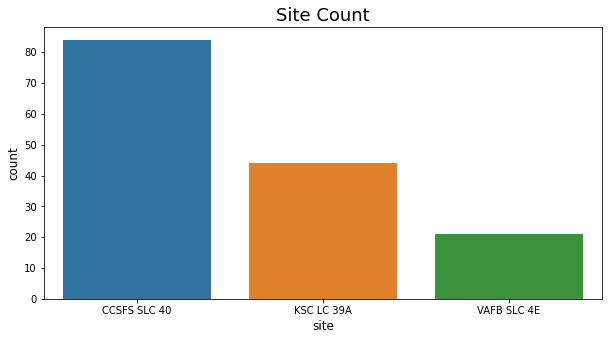

In [59]:
plt.figure(figsize=(10,5))
sns.barplot(x=LaunchSite.index, y=LaunchSite.values)
plt.xlabel("site",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.title('Site Count', fontsize=18);

#### Orbit
Each launch is aimed at a dedicated orbit, and here are some common orbit types:
> - <b>LEO</b>: Low Earth orbit (LEO)is an Earth-centred orbit with an altitude of 2,000 km (1,200 mi) or less 
> - <b>VLEO</b>: Very Low Earth Orbits (VLEO) can be defined as the orbits with a mean altitude below 450 km.
> - <b>GTO</b> A geosynchronous orbit is a high Earth orbit that allows satellites to match Earth's rotation.
> -  <b>SSO or SO</b>: It is a Sun-synchronous orbit is a nearly polar orbit around a planet, in which the satellite passes over any given point of the planet's surface at the same local mean solar time
> - <b>ES-L1 </b>:At the Lagrange points the gravitational forces of the two large bodies cancel out in such a way that a small object placed in orbit there is in equilibrium relative to the center of mass of the large bodies.
> - <b>HEO</b> A highly elliptical orbit, is an elliptic orbit with high eccentricity, usually referring to one around Earth
> - <b> ISS </b> A modular space station (habitable artificial satellite) in low Earth orbit. It is a multinational collaborative project between five participating space agencies: NASA (United States), Roscosmos (Russia), JAXA (Japan), ESA (Europe), and CSA (Canada)
> - <b> MEO </b> Geocentric orbits ranging in altitude from 2,000 km (1,200 mi) to just below geosynchronous orbit
> - <b> HEO </b> Geocentric orbits above the altitude of geosynchronous orbit (35,786 km or 22,236 mi)
> - <b> GEO </b> It is a circular geosynchronous orbit 35,786 kilometres (22,236 miles) above Earth's equator and following the direction of Earth's rotation
> - <b> PO </b> It is one type of satellites in which a satellite passes above or nearly above both poles of the body being orbited (usually a planet such as the Earth

In [60]:
Orbit=df['Orbit'].value_counts()
Orbit

VLEO     41
GTO      31
ISS      30
LEO      13
PO       13
SSO      10
MEO       4
GEO       2
ES-L1     1
HEO       1
SO        1
TLI       1
Name: Orbit, dtype: int64

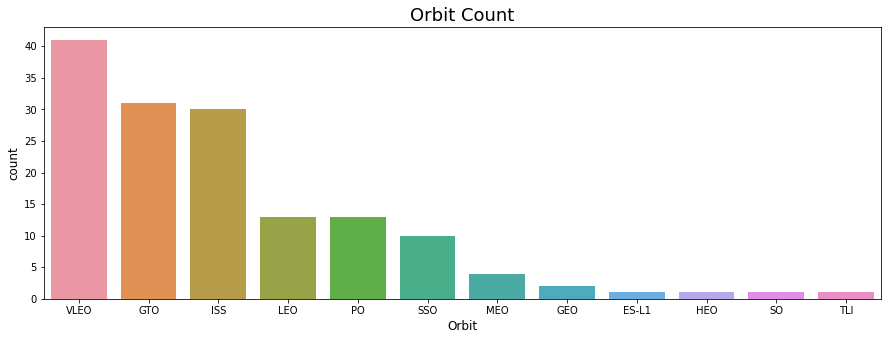

In [61]:
plt.figure(figsize=(15,5))
sns.barplot(x=Orbit.index, y=Orbit.values)
plt.xlabel("Orbit",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.title('Orbit Count', fontsize=18);

#### Landing Outcomes
> - <code>True Ocean</code> means the mission outcome was successfully  landed to a specific region of the ocean while 
> - <code>False Ocean</code> means the mission outcome was unsuccessfully landed to a specific region of the ocean. > - <code>True RTLS</code> means the mission outcome was successfully  landed to a ground pad 
> - <code>False RTLS</code> means the mission outcome was unsuccessfully landed to a ground pad.
> - <code>True ASDS</code> means the mission outcome was successfully  landed to a drone ship 
> - <code>False ASDS</code> means the mission outcome was unsuccessfully landed to a drone ship. 
> - <code>None ASDS</code> and <code>None None</code> these represent a failure to land.

In [62]:
# landing_outcomes = values on Outcome column
landing_outcomes = df["Outcome"].value_counts()
landing_outcomes

True ASDS      91
True RTLS      22
None None      19
False ASDS      7
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

In [63]:
#We create a set of outcomes where the second stage did not land successfully:
bad_outcomes=landing_outcomes.index[[1,3,5,6,7]]

In [64]:
landing_class = []
for x in df["Outcome"]:
    if x in bad_outcomes:
        landing_class.append(0)
    else:
        landing_class.append(1)
df['Class']= landing_class

In [65]:
Class=df['Class'].value_counts()
Class

1    115
0     34
Name: Class, dtype: int64

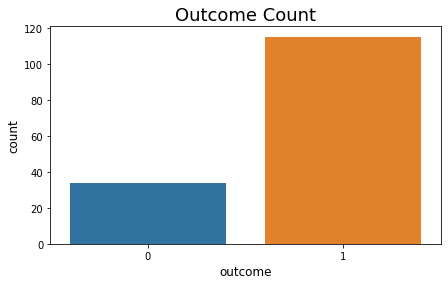

In [66]:
plt.figure(figsize=(7,4))
sns.barplot(x=Class.index, y=Class.values)
plt.xlabel("outcome",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.title('Outcome Count', fontsize=18);

More success that failure

In [67]:
df.head(2)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,1
5,8,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,1


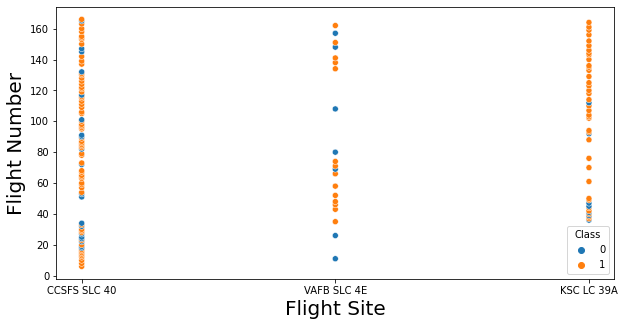

In [68]:
fig = plt.figure(figsize=(10,5))
sns.scatterplot(y="FlightNumber", x="LaunchSite", hue="Class", data=df)
plt.xlabel("Flight Site",fontsize=20)
plt.ylabel("Flight Number",fontsize=20)
plt.show()

The more amount of flights at a launch site the greater the success rate at a launch site. and most flight are lauched from ```CCSFS SLC 40``` and ```KSC LC 39A```

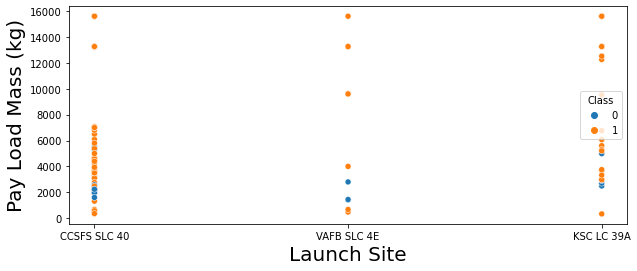

In [69]:
fig = plt.figure(figsize=(10,4))
sns.scatterplot(y="PayloadMass",x="LaunchSite",hue ="Class",data=df)
plt.xlabel("Launch Site",fontsize=20)
plt.ylabel("Pay Load Mass (kg)",fontsize=20)
plt.show()

There is not quite a clear pattern to be found using this visualization to make a decision if the Launch Site is dependant on Pay Load Mass for a success launch. payloads less than 8000 tends to be lauched from ```ccsfs slc 40```

In [70]:
success=df[df['Class']==1]
Orbit = success['Orbit'].value_counts()

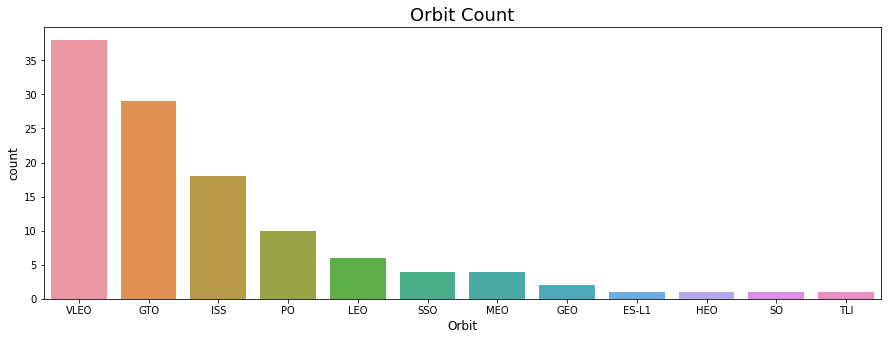

In [71]:
plt.figure(figsize=(15,5))
sns.barplot(x=Orbit.index, y=Orbit.values)
plt.xlabel("Orbit",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.title('Orbit Count', fontsize=18);

```VLEO``` > ```ISS``` > ```GTO``` > ```LEO``` > ```PO``` > ```SSO``` > ```MEO``` > ```GEO``` > ```ES-L1``` >  ```HEO``` > ```TLI```success rate

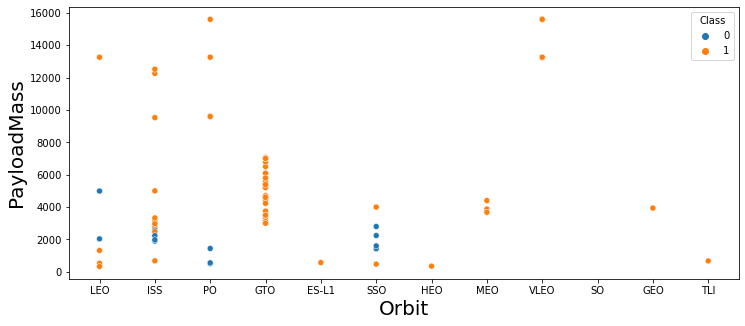

In [72]:
fig = plt.figure(figsize=(12,5))
sns.scatterplot(x="Orbit",y="PayloadMass",hue="Class",data = df)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("PayloadMass",fontsize=20)
plt.show()

Mass taken to GTO are between ```2000``` and ```8000``` kg while mass taken to ```SSO, MEO``` are below ```6000``

In [86]:
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

In [87]:
df['year']=Extract_year(df["Date"])
df_groupby_year=df.groupby("year",as_index=False)["Class"].mean()

In [88]:
df_groupby_year

,year,Class
0,2010,1.000000
1,2012,1.000000
2,2013,0.666667
3,2014,0.833333
4,2015,0.333333
5,2016,0.500000
6,2017,0.666667
7,2018,0.833333
8,2019,0.800000
9,2020,0.760000


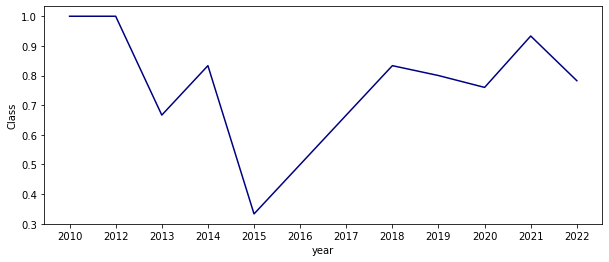

In [89]:
fig = plt.figure(figsize=(10,4))
sns.lineplot(data=df_groupby_year, x="year", y="Class", color='navy' );

From 2015  they has been steady increase in the number of succesful rocket landing 

> The launch success rate may depend on many factors such as payload mass, orbit type, and so on. It may also depend on the location and proximities of a launch site, i.e., the initial position of rocket trajectories. Finding an optimal location for building a launch site certainly involves many factors and hopefully we could discover some of the factors by analyzing the existing launch site locations.

In [90]:
location_df = df[['LaunchSite', 'Latitude', 'Longitude','FlightNumber']]
location_df = location_df.groupby(['LaunchSite'], as_index=False).first()

location_df

,LaunchSite,Latitude,Longitude,FlightNumber
0,CCSFS SLC 40,28.561857,-80.577366,6
1,KSC LC 39A,28.608058,-80.603956,36
2,VAFB SLC 4E,34.632093,-120.610829,11


Above coordinates are just plain numbers that can not give you any intuitive insights about where are those launch 

In [91]:
import plotly.express as px

In [96]:
map1=px.scatter_mapbox(
    data_frame=location_df,

    lat='Latitude',
    lon='Longitude',
    size='FlightNumber',
    width=800,
    opacity=1,
    title='Doctors by States',
    zoom=3,
    center=dict(lat=39.0119,lon=-98.4842)
)
map1.update_traces(showlegend=False,  text=list(location_df['LaunchSite']), textfont=dict(color='#fff'))
map1.update_layout(
    {
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
},
    mapbox_style="carto-darkmatter",margin=dict(l=0, r=0, t=0, b=0))

Most of the launches are located on the coast line or at Pacific

## Summary

1. ```Cape Canaveral Space Launch Complex 40``` is the site with most number of lauches.
2. Mass taken to GTO are between ```2000``` and ```8000``` kg while mass taken to ```SSO, MEO``` are below ```6000``
3. The success of landing has been increasing over the years
4. Payloads less than 8000 tends to be lauched from ```Cape Canaveral Space Launch Complex 40```
5. Most launch were made to ```Very Low Earth Orbit```

In [100]:
df.to_csv('dataset3.csv', index=False)